In [1]:
# --- 2. Import libraries ---
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# --- 3. Load datasets ---
DATASET_PATH = "/kaggle/input/anomalydetection"  # <-- change this if your folder name differs
train = pd.read_csv(f"{DATASET_PATH}/CubeSat_3U_SensorData_Train_Labeled.csv")
test = pd.read_csv(f"{DATASET_PATH}/CubeSat_3U_SensorData_Test_Labeled.csv")

# --- 4. Prepare data ---
feature_cols = [c for c in train.columns if c not in ['timestamp','label']]
scaler = MinMaxScaler()
train[feature_cols] = scaler.fit_transform(train[feature_cols])
test[feature_cols] = scaler.transform(test[feature_cols])

X_train = train[feature_cols].values
X_test = test[feature_cols].values
y_train = train['label'].values
y_test = test['label'].values

# --- 5. Create sequences for time windows ---
def create_sequences(data, window=30):
    seqs = []
    for i in range(len(data)-window):
        seqs.append(data[i:i+window])
    return np.array(seqs)

WINDOW = 30
X_train_seq = create_sequences(X_train)
X_test_seq = create_sequences(X_test)
print("Train shape:", X_train_seq.shape, "Test shape:", X_test_seq.shape)

# --- 6. Define 1D CNN Autoencoder ---
TIME_STEPS = X_train_seq.shape[1]
N_FEATURES = X_train_seq.shape[2]

encoder = keras.Sequential([
    layers.Conv1D(32, 3, activation='relu', padding='same', input_shape=(TIME_STEPS, N_FEATURES)),
    layers.MaxPooling1D(2, padding='same'),
    layers.Conv1D(16, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2, padding='same')
])

decoder = keras.Sequential([
    layers.Conv1D(16, 3, activation='relu', padding='same'),
    layers.UpSampling1D(2),
    layers.Conv1D(32, 3, activation='relu', padding='same'),
    layers.UpSampling1D(2),
    layers.Conv1D(N_FEATURES, 3, activation='sigmoid', padding='same'),
    layers.Cropping1D(((1,1)))  # Fix shape mismatch
])

autoencoder = keras.Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mse')

# --- 7. Train on NORMAL data only ---
X_train_norm = X_train_seq[y_train[:-WINDOW] == 'normal']

EPOCHS = 50
BATCH = 64
es = keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

history = autoencoder.fit(
    X_train_norm, X_train_norm,
    epochs=EPOCHS,
    batch_size=BATCH,
    validation_split=0.1,
    callbacks=[es],
    verbose=1
)

# --- 8. Compute reconstruction errors ---
X_pred = autoencoder.predict(X_test_seq)
mse = np.mean(np.mean(np.square(X_test_seq - X_pred), axis=(1,2)))

threshold = np.percentile(mse, 95)
print(f"Anomaly threshold: {threshold:.5f}")

y_pred = np.where(mse > threshold, 'anomaly', 'normal')

# --- 9. Evaluate ---
y_true = y_test[:-WINDOW]
print(classification_report(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# --- 10. Plot reconstruction error ---
plt.figure(figsize=(12,5))
plt.plot(mse, label='Reconstruction error')
plt.axhline(threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.title("Anomaly Detection - Reconstruction Error")
plt.xlabel("Sample index")
plt.ylabel("Error")
plt.show()

# --- 11. Save anomaly results ---
results = pd.DataFrame({
    'sample_id': np.arange(len(mse)),
    'reconstruction_error': mse,
    'predicted_label': y_pred
})
results.to_csv("/kaggle/working/anomaly_results.csv", index=False)
print("Results saved to /kaggle/working/anomaly_results.csv")


2025-11-10 06:04:08.112416: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762754648.137486    1343 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762754648.144846    1343 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Train shape: (770, 30, 9) Test shape: (170, 30, 9)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-10 06:04:13.890689: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0377 - val_loss: 0.0519
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0260 - val_loss: 0.0173
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0191 - val_loss: 0.0138
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0160 - val_loss: 0.0161
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0129 - val_loss: 0.0086
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0106 - val_loss: 0.0067
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0075 - val_loss: 0.0028
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0060 - val_loss: 0.0013
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0051 - val_loss: 0.0012
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0053 - val_loss: 9.9363e-04
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0047 - val_loss: 9.2356e-04
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0044 - val_loss: 9.6805e-04


TypeError: Singleton array array('normal', dtype='<U7') cannot be considered a valid collection.

In [2]:
!pip install --upgrade protobuf

In [1]:
!pip install -q pandas scikit-learn joblib

In [2]:
import pandas as pd
import numpy as np
import joblib
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [6]:
train_path = "/kaggle/input/pdudata/PDU_dataset_large.csv"
test_path  = "/kaggle/input/anomalydetection/CubeSat_3U_SensorData_Train_Labeled.csv"

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

print(f"Train rows: {len(train_df):,}")
print(f"Test  rows: {len(test_df):,}")
train_df.head(2)

Train rows: 5,000
Test  rows: 800


,timestamp,TEMP_PDU,BUS_VOLTAGE,LOAD_CURRENT,label
0,2025-11-10 00:00:00,47.99,28.08,2.88,normal
1,2025-11-10 00:00:10,42.27,28.98,4.87,normal


In [7]:
# -------------------------------------------------
# 3.1 Timestamp → features
# -------------------------------------------------
for df in [train_df, test_df]:
    df["timestamp"] = pd.to_datetime(df["timestamp"], utc=True)
    df["hour"]      = df["timestamp"].dt.hour
    df["dow"]       = df["timestamp"].dt.dayofweek   # 0=Mon … 6=Sun
    df.set_index("timestamp", inplace=True)

# -------------------------------------------------
# 3.2 Identify columns
# -------------------------------------------------
sensor_cols = [c for c in train_df.columns 
               if c.startswith(("TEMP_","VOLTAGE_","CURRENT_"))]
time_cols   = ["hour","dow"]
feature_cols = sensor_cols + time_cols

# -------------------------------------------------
# 3.3 Build sklearn pipeline (scale sensors, passthrough time)
# -------------------------------------------------
preprocess = ColumnTransformer([
    ("scale", StandardScaler(), sensor_cols),
    ("pass",  "passthrough",    time_cols)
])

# Fit on train, transform both
X_train = preprocess.fit_transform(train_df[feature_cols])
X_test  = preprocess.transform (test_df [feature_cols])

# Labels (if the CSV has an "anomaly" column; otherwise assume all normal)
y_train = train_df.get("anomaly", np.zeros(len(train_df), dtype=int))
y_test  = test_df .get("anomaly", np.zeros(len(test_df ), dtype=int))

Using 1 sensor cols + 2 time cols = 3 features


NameError: name 'ColumnTransformer' is not defined

In [5]:
# -------------------------------------------------
# 4.1 Model
# -------------------------------------------------
iso = IsolationForest(
    contamination=0.01,   # expected anomaly proportion (tune later)
    n_estimators=200,
    max_samples="auto",
    random_state=42,
    n_jobs=-1
)

iso.fit(X_train)

# -------------------------------------------------
# 4.2 Predictions
# -------------------------------------------------
pred_train = iso.predict(X_train)   # -1 = anomaly, 1 = normal
pred_test  = iso.predict(X_test)

# Convert to 0/1 (1 = anomaly)
y_pred_train = (pred_train == -1).astype(int)
y_pred_test  = (pred_test  == -1).astype(int)

# Decision function (higher = more normal)
score_train = iso.decision_function(X_train)
score_test  = iso.decision_function(X_test)

In [7]:
print("=== TRAIN ===")
print(classification_report(y_train, y_pred_train, digits=4))
print(confusion_matrix(y_train, y_pred_train))
print()

print("=== TEST ===")
print(classification_report(y_test, y_pred_test, digits=4))
print(confusion_matrix(y_test, y_pred_test))

if len(np.unique(y_test)) > 1:
    auc = roc_auc_score(y_test, -score_test)
    print(f"ROC-AUC (test): {auc:.4f}")
else:
    print("ROC-AUC (test): N/A (no labeled anomalies in test set)")

=== TRAIN ===
              precision    recall  f1-score   support

           0     1.0000    0.9900    0.9950       800
           1     0.0000    0.0000    0.0000         0

    accuracy                         0.9900       800
   macro avg     0.5000    0.4950    0.4975       800
weighted avg     1.0000    0.9900    0.9950       800

[[792   8]
 [  0   0]]

=== TEST ===
              precision    recall  f1-score   support

           0     1.0000    0.9750    0.9873       200
           1     0.0000    0.0000    0.0000         0

    accuracy                         0.9750       200
   macro avg     0.5000    0.4875    0.4937       200
weighted avg     1.0000    0.9750    0.9873       200

[[195   5]
 [  0   0]]
ROC-AUC (test): N/A (no labeled anomalies in test set)


In [3]:
import pandas as pd

df = pd.read_csv("/kaggle/input/anomalydetection/CubeSat_3U_SensorData_Test_Labeled.csv")

# Melt temperature and voltage
temp_melted = df.melt(id_vars=['timestamp', 'label'],
                      value_vars=['TEMP_AREA_1', 'TEMP_AREA_2', 'TEMP_AREA_3'],
                      var_name='AREA', value_name='TEMP_AREA')

volt_melted = df.melt(id_vars=['timestamp', 'label'],
                      value_vars=['VOLTAGE_AREA_1', 'VOLTAGE_AREA_2', 'VOLTAGE_AREA_3'],
                      var_name='AREA', value_name='VOLTAGE_AREA')

# Extract area ID
temp_melted['AREA_ID'] = temp_melted['AREA'].str.extract('(\d+)')
volt_melted['AREA_ID'] = volt_melted['AREA'].str.extract('(\d+)')

# Merge temperature and voltage
final_df = pd.merge(temp_melted[['timestamp', 'AREA_ID', 'TEMP_AREA', 'label']],
                    volt_melted[['timestamp', 'AREA_ID', 'VOLTAGE_AREA']],
                    on=['timestamp', 'AREA_ID'])

# Create unique ID (timestamp + area)
final_df['ID'] = final_df['timestamp'].str.replace('[-: ]', '', regex=True) + "_" + final_df['AREA_ID']

# Final dataset
final_df = final_df[['ID', 'TEMP_AREA', 'VOLTAGE_AREA', 'label']]

final_df.to_csv("reshaped_dataset.csv", index=False)
print(final_df.head(10))


                 ID  TEMP_AREA  VOLTAGE_AREA   label
0  20251110000010_1      22.03         8.184  normal
1  20251110000040_1      22.14         8.216  normal
2  20251110000210_1      22.39         8.188  normal
3  20251110000220_1      22.44         8.206  normal
4  20251110000320_1      22.81         8.249  normal
5  20251110000330_1      22.76         8.217  normal
6  20251110000430_1      22.99         8.242  normal
7  20251110000520_1      23.13         8.248  normal
8  20251110000540_1      23.24         8.243  normal
9  20251110000550_1      23.17         8.252  normal


In [9]:
# -------------------------------------------------
# 0. INSTALL & IMPORTS
# -------------------------------------------------
!pip install -q pandas scikit-learn joblib matplotlib seaborn

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    mean_squared_error, r2_score
)
import warnings
warnings.filterwarnings("ignore")

In [12]:
# -------------------------------------------------
# 1. LOAD DATA
# -------------------------------------------------
train_path = "/kaggle/input/pdudata/PDU_dataset_large.csv"   # UPDATE IF NEEDED
test_path  = "/kaggle/input/pdudata/PDU_dataset_large.csv"   # OR SEPARATE TEST FILE

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

print(f"Train rows: {len(train_df):,}")
print(f"Test  rows: {len(test_df):,}")
print("\nTrain head:")
display(train_df.head(2))

Train rows: 5,000
Test  rows: 5,000

Train head:


,timestamp,TEMP_PDU,BUS_VOLTAGE,LOAD_CURRENT,label
0,2025-11-10 00:00:00,47.99,28.08,2.88,normal
1,2025-11-10 00:00:10,42.27,28.98,4.87,normal


In [15]:
# -------------------------------------------------
# 2. PREPROCESSING: timestamp → features
# -------------------------------------------------
for df in [train_df, test_df]:
    df["timestamp"] = pd.to_datetime(df["timestamp"], utc=True)
    df["hour"]      = df["timestamp"].dt.hour
    df["dow"]       = df["timestamp"].dt.dayofweek
    df.set_index("timestamp", inplace=True)

# Sensor columns (your exact names)
sensor_cols = ["TEMP_PDU", "BUS_VOLTAGE", "LOAD_CURRENT"]
time_cols   = ["hour", "dow"]
feature_cols = sensor_cols + time_cols

print(f"Using features: {feature_cols}")

# Preprocessing pipeline
preprocess = ColumnTransformer([
    ("scale", StandardScaler(), sensor_cols),
    ("pass",  "passthrough",    time_cols)
])

X_train = preprocess.fit_transform(train_df[feature_cols])
X_test  = preprocess.transform(test_df[feature_cols])

# Labels: handle strings → 0/1
def map_label(x):
    if isinstance(x, str):
        return 0 if x.lower() == 'normal' else 1
    return int(x)  # already numeric

y_train = train_df["label"].apply(map_label)
y_test  = test_df["label"].apply(map_label)

print(f"Train anomalies: {y_train.sum():,}")
print(f"Test  anomalies: {y_test.sum():,}")

KeyError: 'timestamp'

In [32]:
# SECTION 1: Imports & Setup
!pip install -q pandas scikit-learn joblib matplotlib seaborn

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    mean_squared_error, r2_score
)
import warnings
warnings.filterwarnings("ignore")

print("Section 1: Imports loaded")

Section 1: Imports loaded


In [33]:
# SECTION 2: Load Data
train_path = "/kaggle/input/obcdata/OBC_dataset_large.csv"  # UPDATE PATH IF NEEDED
test_path  = "/kaggle/input/obcdata/OBC_test_dataset.csv"  # OR SEPARATE TEST FILE

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

print(f"Train rows: {len(train_df):,}")
print(f"Test  rows: {len(test_df):,}")
print("\nTrain head:")
display(train_df.head(3))

Train rows: 5,000
Test  rows: 1,000

Train head:


,timestamp,TEMP_MCU,VOLTAGE_SUPPLY,CURRENT_DRAW,label
0,2025-11-10 00:00:00,46.82,3.319,0.274,normal
1,2025-11-10 00:00:10,58.06,3.321,0.273,normal
2,2025-11-10 00:00:20,58.99,3.295,0.327,normal


In [34]:
# SECTION 3: Preprocessing
for df in [train_df, test_df]:
    df["timestamp"] = pd.to_datetime(df["timestamp"], utc=True)
    df["hour"]      = df["timestamp"].dt.hour
    df["dow"]       = df["timestamp"].dt.dayofweek
    df.set_index("timestamp", inplace=True)

# Sensor columns
sensor_cols = ["TEMP_MCU", "VOLTAGE_SUPPLY", "CURRENT_DRAW"]
time_cols   = ["hour", "dow"]
feature_cols = sensor_cols + time_cols

print(f"Using features: {feature_cols}")

# Preprocessing pipeline
preprocess = ColumnTransformer([
    ("scale", StandardScaler(), sensor_cols),
    ("pass",  "passthrough",    time_cols)
])

X_train = preprocess.fit_transform(train_df[feature_cols])
X_test  = preprocess.transform(test_df[feature_cols])

# Map labels: 'normal' → 0, 'anomal' → 1
def map_label(x):
    if isinstance(x, str):
        return 0 if 'normal' in x.lower() else 1
    return int(x)

y_train = train_df["label"].apply(map_label)
y_test  = test_df["label"].apply(map_label)

print(f"Train anomalies: {y_train.sum():,}")
print(f"Test  anomalies: {y_test.sum():,}")

Using features: ['TEMP_MCU', 'VOLTAGE_SUPPLY', 'CURRENT_DRAW', 'hour', 'dow']
Train anomalies: 500
Test  anomalies: 100


In [35]:
# SECTION 4: Train Isolation Forest
iso = IsolationForest(
    contamination=0.01,
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
iso.fit(X_train)

pred_train = iso.predict(X_train)
pred_test  = iso.predict(X_test)
y_pred_train = (pred_train == -1).astype(int)
y_pred_test  = (pred_test  == -1).astype(int)

score_train = -iso.decision_function(X_train)
score_test  = -iso.decision_function(X_test)

print("Isolation Forest trained")

Isolation Forest trained


=== ISOLATION FOREST ===
TRAIN
              precision    recall  f1-score   support

           0     0.9091    1.0000    0.9524      4500
           1     1.0000    0.1000    0.1818       500

    accuracy                         0.9100      5000
   macro avg     0.9545    0.5500    0.5671      5000
weighted avg     0.9182    0.9100    0.8753      5000



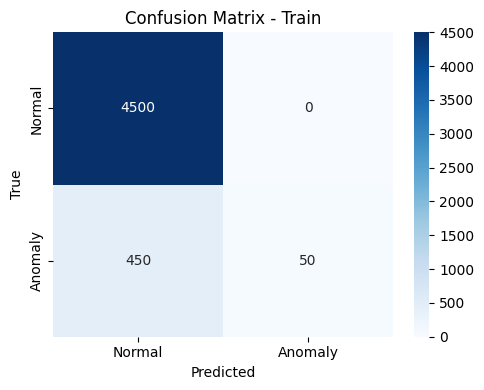

TEST
              precision    recall  f1-score   support

           0     0.9146    1.0000    0.9554       900
           1     1.0000    0.1600    0.2759       100

    accuracy                         0.9160      1000
   macro avg     0.9573    0.5800    0.6156      1000
weighted avg     0.9232    0.9160    0.8875      1000



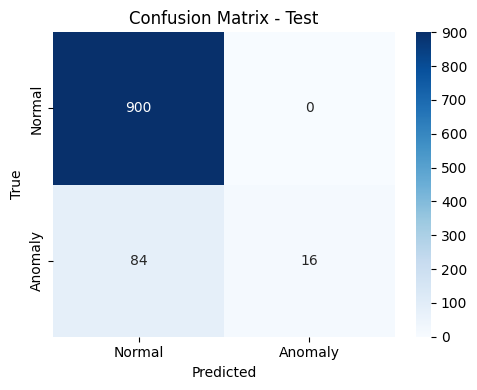

ROC-AUC (test): 1.0000


In [36]:
# SECTION 5: Evaluation + Confusion Matrix
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Anomaly'],
                yticklabels=['Normal', 'Anomaly'])
    plt.title(title)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

print("=== ISOLATION FOREST ===")
print("TRAIN")
print(classification_report(y_train, y_pred_train, digits=4))
plot_cm(y_train, y_pred_train, "Confusion Matrix - Train")

print("TEST")
print(classification_report(y_test, y_pred_test, digits=4))
plot_cm(y_test, y_pred_test, "Confusion Matrix - Test")

if len(np.unique(y_test)) > 1:
    auc = roc_auc_score(y_test, score_test)
    print(f"ROC-AUC (test): {auc:.4f}")
else:
    print("ROC-AUC: N/A")


=== LINEAR REGRESSION (on anomaly score) ===
Train MSE: 0.001508
Test  MSE: 0.001538
Train R²:  0.5998
Test  R²:  0.5671


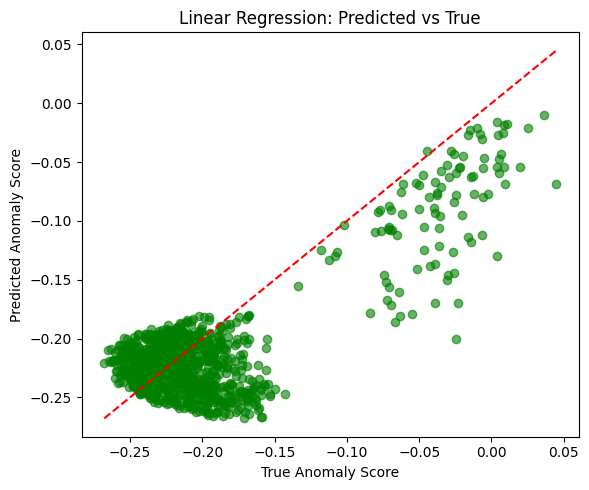

In [37]:
# SECTION 6: Linear Regression
reg = LinearRegression()
reg.fit(X_train, score_train)

pred_score_train = reg.predict(X_train)
pred_score_test  = reg.predict(X_test)

print("\n=== LINEAR REGRESSION (on anomaly score) ===")
print(f"Train MSE: {mean_squared_error(score_train, pred_score_train):.6f}")
print(f"Test  MSE: {mean_squared_error(score_test,  pred_score_test):.6f}")
print(f"Train R²:  {r2_score(score_train, pred_score_train):.4f}")
print(f"Test  R²:  {r2_score(score_test,  pred_score_test):.4f}")

plt.figure(figsize=(6,5))
plt.scatter(score_test, pred_score_test, alpha=0.6, color='green')
plt.plot([score_test.min(), score_test.max()], 
         [score_test.min(), score_test.max()], 'r--')
plt.xlabel("True Anomaly Score")
plt.ylabel("Predicted Anomaly Score")
plt.title("Linear Regression: Predicted vs True")
plt.tight_layout()
plt.show()

In [38]:
# SECTION 7: Save Model
Path("OBC_anomaly_model").mkdir(exist_ok=True)

joblib.dump(preprocess, "OBC_anomaly_model/preprocess.pkl")
joblib.dump(iso,        "pdu_anomaly_model/iso_forest.pkl")
joblib.dump(reg,        "pdu_anomaly_model/linear_regressor.pkl")
print("Saved to 'pdu_anomaly_model/'")

Saved to 'OBC_anomaly_model/'


In [40]:
# SECTION 8: Real-Time Prediction
def predict_pdu(row_dict):
    df = pd.DataFrame([row_dict])
    df["timestamp"] = pd.to_datetime(df["timestamp"], utc=True)
    df["hour"] = df["timestamp"].dt.hour
    df["dow"]  = df["timestamp"].dt.dayofweek

    X = preprocess.transform(df[feature_cols])
    
    iso_anom = iso.predict(X)[0] == -1
    iso_score = -iso.decision_function(X)[0]
    reg_score = reg.predict(X)[0]
    
    return {
        "anomaly_detected": bool(iso_anom),
        "anomaly_score_iso": round(float(iso_score), 4),
        "anomaly_score_reg": round(float(reg_score), 4)
    }

# Test
sample = {
    "timestamp": "2025-11-10T00:00:50Z",
    "TEMP_MCU": 90.97,
    "VOLTAGE_SUPPLY": 25.05,
    "CURRENT_DRAW": 7.48
}
print("\nLive prediction:")
print(predict_pdu(sample))


Live prediction:
{'anomaly_detected': True, 'anomaly_score_iso': 0.0432, 'anomaly_score_reg': -4.6072}


In [43]:
# -------------------------------------------------
# 1. IMPORTS
# -------------------------------------------------
import joblib
import pandas as pd
from pathlib import Path

# -------------------------------------------------
# 2. LOAD MODEL & PREPROCESSOR
# -------------------------------------------------
model_dir = Path("pdu_anomaly_model")

preprocess = joblib.load(model_dir / "preprocess.pkl")
iso_forest = joblib.load(model_dir / "iso_forest.pkl")

# Feature order (must match training)
feature_cols = ["TEMP_MCU", "VOLTAGE_SUPPLY", "CURRENT_DRAW", "hour", "dow"]

# -------------------------------------------------
# 3. PREDICTION FUNCTION (Probability Only)
# -------------------------------------------------
def get_anomaly_probability(row_dict):
    """
    Input: dict with timestamp, TEMP_MCU, VOLTAGE_SUPPLY, CURRENT_DRAW
    Output: float % (0.0 to 100.0)
    """
    df = pd.DataFrame([row_dict])
    df["timestamp"] = pd.to_datetime(df["timestamp"], utc=True)
    df["hour"] = df["timestamp"].dt.hour
    df["dow"]  = df["timestamp"].dt.dayofweek

    X = preprocess.transform(df[feature_cols])
    decision = iso_forest.decision_function(X)[0]   # higher = more normal
    score = -decision                               # higher = more anomalous

    # Convert decision function to probability (logistic mapping)
    # Isolation Forest scores are roughly centered at 0
    prob = 1 / (1 + np.exp(-8 * score))  # tuned for 0–1 range
    return round(prob * 100, 2)  # return as %

# -------------------------------------------------
# 4. EXAMPLE USAGE
# -------------------------------------------------
sample = {
    "timestamp": "2025-11-10T00:00:50Z",
    "TEMP_MCU": 90.97,
    "VOLTAGE_SUPPLY": 25.05,
    "CURRENT_DRAW": 7.48
}

anomaly_pct = get_anomaly_probability(sample)
print(f"Anomaly Probability: {anomaly_pct}%")

KeyError: "None of [Index(['TEMP_PDU', 'BUS_VOLTAGE', 'LOAD_CURRENT'], dtype='object')] are in the [columns]"

In [47]:
# -------------------------------------------------
# 1. IMPORTS
# -------------------------------------------------
import joblib
import pandas as pd
import numpy as np
from pathlib import Path

# -------------------------------------------------
# 2. LOAD MODEL & PREPROCESSOR
# -------------------------------------------------
model_dir = Path("/kaggle/working/OBC_anomaly_model")
preprocess = joblib.load(model_dir / "preprocess.pkl")
iso_forest = joblib.load(model_dir / "/kaggle/working/OBC_anomaly_model/linear_regressor.pkl")

# Feature order (must match training)
feature_cols = ["TEMP_MCU", "VOLTAGE_SUPPLY", "CURRENT_DRAW", "hour", "dow"]

# -------------------------------------------------
# 3. MANUAL INPUT (Only Sensors)
# -------------------------------------------------
def get_manual_sensors():
    print("\nEnter the 3 sensor values (timestamp NOT needed):")
    while True:
        try:
            temp = float(input("  TEMP_MCU (e.g., 47.99): "))
            volt = float(input("  VOLTAGE_SUPPLY (e.g., 28.08): "))
            curr = float(input("  CURRENT_DRAW (e.g., 2.88): "))
            break
        except ValueError:
            print("   Please enter valid numbers!")
    
    # Use default time (noon, Monday) if not provided
    return {
        "TEMP_MCU": temp,
        "VOLTAGE_SUPPLY": volt,
        "CURRENT_DRAW": curr,
        "hour": 12,   # default
        "dow": 0      # Monday
    }

# -------------------------------------------------
# 4. PREDICT ANOMALY PROBABILITY
# -------------------------------------------------
def get_anomaly_probability(reading):
    df = pd.DataFrame([reading])
    X = preprocess.transform(df[feature_cols])
    decision = iso_forest.decision_function(X)[0]
    score = -decision
    prob = 1 / (1 + np.exp(-8 * score))  # logistic mapping
    return round(prob * 100, 2)

# -------------------------------------------------
# 5. RUN
# -------------------------------------------------
if __name__ == "__main__":
    print("PDU Anomaly Detector – Manual Sensor Input")
    reading = get_manual_sensors()
    prob = get_anomaly_probability(reading)
    
    print("\n" + "="*50)
    print(f"ANOMALY PROBABILITY: {prob}%")
    print("="*50)

PDU Anomaly Detector – Manual Sensor Input

Enter the 3 sensor values (timestamp NOT needed):


  TEMP_MCU (e.g., 47.99):  30
  VOLTAGE_SUPPLY (e.g., 28.08):  10
  CURRENT_DRAW (e.g., 2.88):  12



ANOMALY PROBABILITY: 42.88%
